In [26]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats

In [27]:
#localização dos dados
path_input = r"C:\Users\MarceloPereiraMarcoP\Desktop\DataViz\house-prices-advanced-regression-techniques"
#link dos dados
#https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

#Carregando os dados
data = pd.read_csv(path_input + "/train.csv")

In [28]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [38]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [39]:
df = data[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice']]

In [96]:
df = data[[ 'LotFrontage', 'LotArea',
        'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
         'MasVnrArea',  '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
       'TotRmsAbvGrd',  'Fireplaces', 
       'GarageCars',  'SalePrice']]

In [97]:
df.head(10)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,1stFlrSF,2ndFlrSF,LowQualFinSF,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,SalePrice
0,65.0,8450,7,5,2003,2003,196.0,856,854,0,...,1,0,2,1,3,1,8,0,2,208500
1,80.0,9600,6,8,1976,1976,0.0,1262,0,0,...,0,1,2,0,3,1,6,1,2,181500
2,68.0,11250,7,5,2001,2002,162.0,920,866,0,...,1,0,2,1,3,1,6,1,2,223500
3,60.0,9550,7,5,1915,1970,0.0,961,756,0,...,1,0,1,0,3,1,7,1,3,140000
4,84.0,14260,8,5,2000,2000,350.0,1145,1053,0,...,1,0,2,1,4,1,9,1,3,250000
5,85.0,14115,5,5,1993,1995,0.0,796,566,0,...,1,0,1,1,1,1,5,0,2,143000
6,75.0,10084,8,5,2004,2005,186.0,1694,0,0,...,1,0,2,0,3,1,7,1,2,307000
7,NaN,10382,7,6,1973,1973,240.0,1107,983,0,...,1,0,2,1,3,1,7,2,2,200000
8,51.0,6120,7,5,1931,1950,0.0,1022,752,0,...,0,0,2,0,2,2,8,2,2,129900
9,50.0,7420,5,6,1939,1950,0.0,1077,0,0,...,1,0,1,0,2,2,5,2,1,118000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   LotArea       1460 non-null   int64  
 2   OverallQual   1460 non-null   int64  
 3   OverallCond   1460 non-null   int64  
 4   YearBuilt     1460 non-null   int64  
 5   YearRemodAdd  1460 non-null   int64  
 6   MasVnrArea    1452 non-null   float64
 7   1stFlrSF      1460 non-null   int64  
 8   2ndFlrSF      1460 non-null   int64  
 9   LowQualFinSF  1460 non-null   int64  
 10  GrLivArea     1460 non-null   int64  
 11  BsmtFullBath  1460 non-null   int64  
 12  BsmtHalfBath  1460 non-null   int64  
 13  FullBath      1460 non-null   int64  
 14  HalfBath      1460 non-null   int64  
 15  BedroomAbvGr  1460 non-null   int64  
 16  KitchenAbvGr  1460 non-null   int64  
 17  TotRmsAbvGrd  1460 non-null   int64  
 18  Fireplaces    1460 non-null 

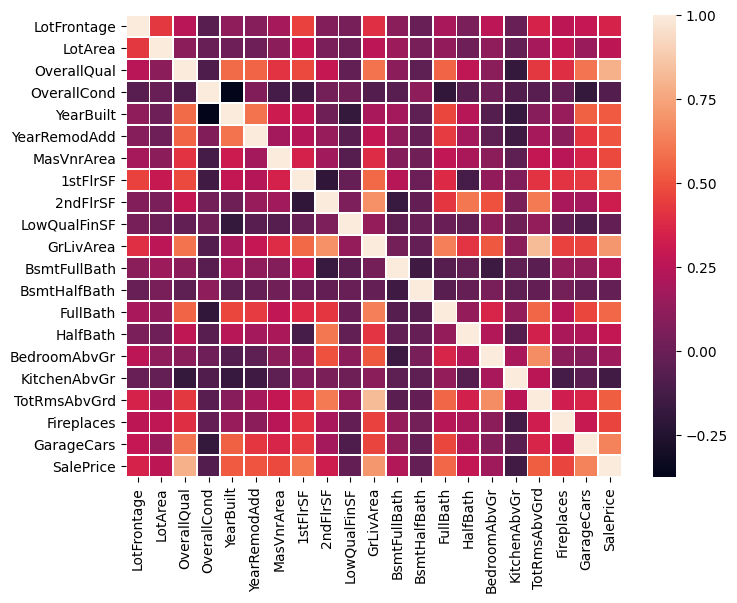

In [111]:
plt.rcdefaults()
f, ax = plt.subplots(figsize=(8, 6))
a = df.corr()
ax = sns.heatmap(a, linewidth=0.5)

In [7]:
df = data

<AxesSubplot:>

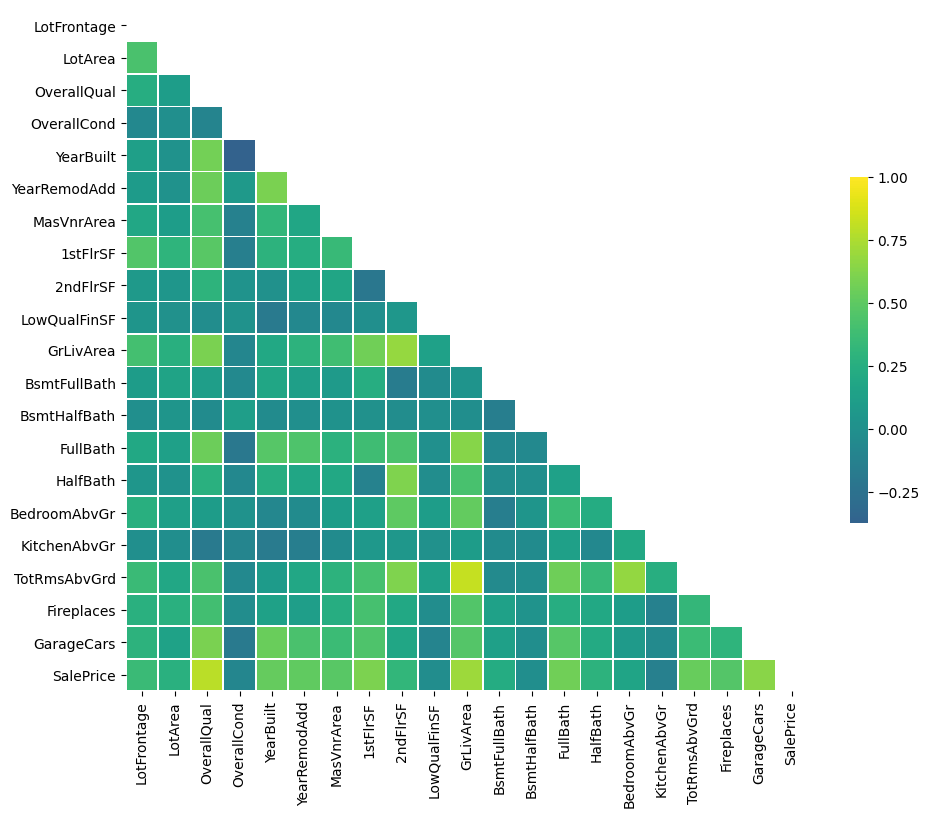

In [115]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

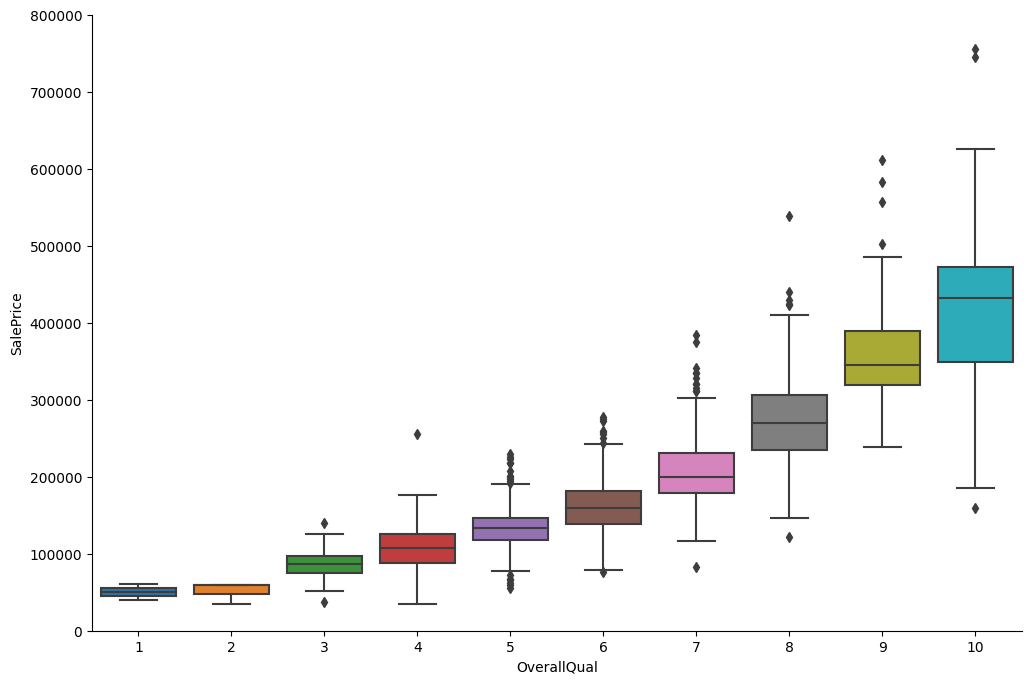

In [106]:
var = 'OverallQual'
df2=pd.concat([data['SalePrice'],data[var]],axis=1)
f,ax = plt.subplots(figsize=(12,8))
sns.boxplot(x=var,y='SalePrice',data=df2)
plt.axis(ymin=0,ymax= 800000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

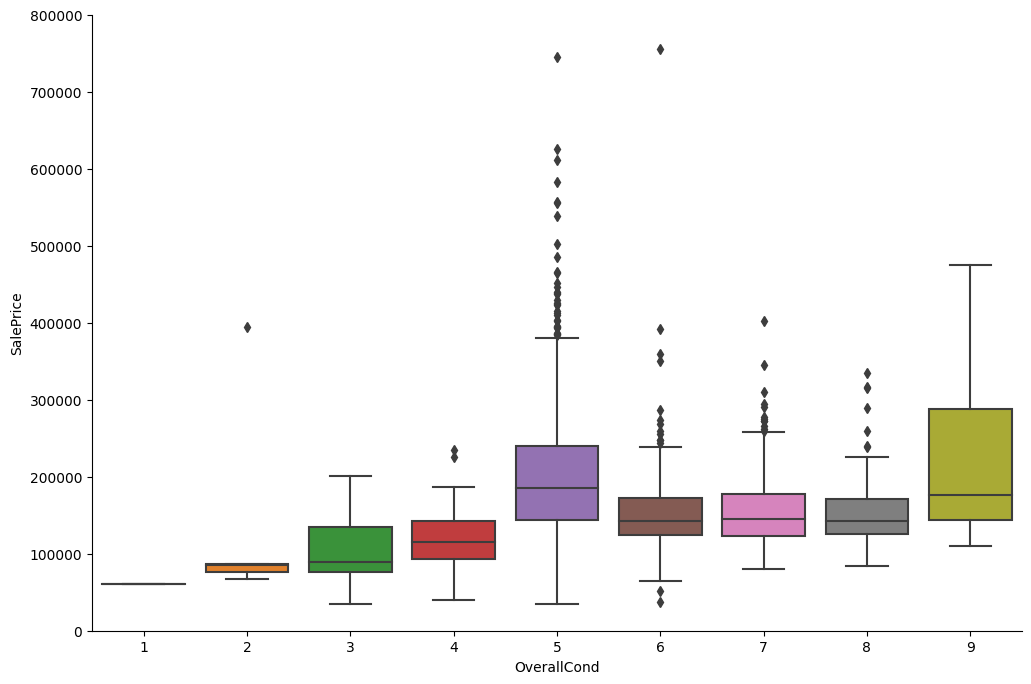

In [107]:
var = 'OverallCond'
df3=pd.concat([data['SalePrice'],data[var]],axis=1)
f,ax = plt.subplots(figsize=(12,8))
sns.boxplot(x=var,y='SalePrice',data=df3)
plt.axis(ymin=0,ymax= 800000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

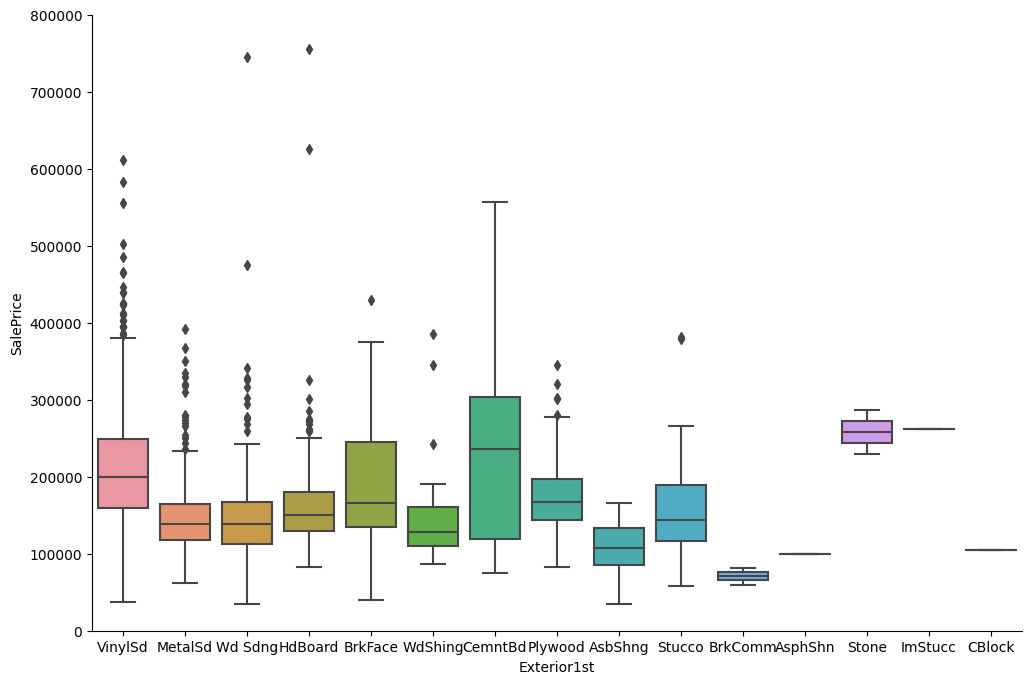

In [108]:
var = 'Exterior1st'
df5=pd.concat([data['SalePrice'],data[var]],axis=1)
f,ax = plt.subplots(figsize=(12,8))
sns.boxplot(x=var,y='SalePrice',data=df5)
plt.axis(ymin=0,ymax= 800000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()